In [1]:
# browsing6.py demonstrates pixel-level operations on LSST lab test images
# C. Stubbs Feb 20, 2016

# best to start command line with ipython --pylab if not running inside notebook
# initialize by importing useful stuff
import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
import astropy.stats
from astropy.io import fits
import scipy as sc
import scipy.signal
import textwrap

# this next magic command makes plots appear within the notebook
%matplotlib inline

# define figure size parameters to make figures larger than default
figwidth=10
figheight=10

In [2]:
# open a FITS file 
hdulist=fits.open("foo.fits")

# look at objects that reside within this "list". Note this list is zero-based.
hdulist.info()


Filename: foo.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      59   ()              
1    Segment10   ImageHDU        35   (544, 2048)   int16 (rescales to uint16)   
2    Segment11   ImageHDU        35   (544, 2048)   int16 (rescales to uint16)   
3    Segment12   ImageHDU        35   (544, 2048)   int16 (rescales to uint16)   
4    Segment13   ImageHDU        35   (544, 2048)   int16 (rescales to uint16)   
5    Segment14   ImageHDU        35   (544, 2048)   int16 (rescales to uint16)   
6    Segment15   ImageHDU        35   (544, 2048)   int16 (rescales to uint16)   
7    Segment16   ImageHDU        35   (544, 2048)   int16 (rescales to uint16)   
8    Segment17   ImageHDU        35   (544, 2048)   int16 (rescales to uint16)   
9    Segment07   ImageHDU        35   (544, 2048)   int16 (rescales to uint16)   
10   Segment06   ImageHDU        35   (544, 2048)   int16 (rescales to uint16)   
11   Segment05   ImageHDU        35   (544, 2048

In [3]:
# convert header to string and print header information for primary header 
print "----------extension 0 header-------------" # common to all HDU elements for this image
print " "
print textwrap.fill(str(hdulist[0].header),80) # this slightly obscure syntax makes printout 80 columns wide


----------extension 0 header-------------
 
SIMPLE  =                    T / Java FITS: Thu Jan 21 17:29:31 EST 2016
BITPIX  =                    8 / bits per data value
NAXIS   =                    0 / number of axes
EXTEND  =                    T / Extensions are permitted
ORIGIN  = 'BNL     '           / Which site acquired the data
DATE    = '2016-01-22T06:46:12.467' / Creation Date and Time of File
DATE-OBS= '2016-01-22T06:46:00.475' / Date of the observation (image
acquisitionMJD-OBS =      57409.281949942 / Modified Julian Date of image
acquisition      IMAGETAG= 'CCS     '           / Image tag (CCS/VST)
TSTAND  = 'BNL-TS3-1-Sisko'    / Which Test stand at the site was used
INSTRUME= 'ArchonCCDController' / CCD Controller type
CONTROLL= 'ArchonCCDController' / Duplicates INSTRUME
CCD_MANU= 'E2V     '           / CCD Manufacturer
CCD_TYPE= 'E2V11093-12-01'     / CCD Model Number
CCD_SERN= 'E2V-CCD250-088'     / Manufacturers? CCD Serial Number
LSST_NUM= 'E2V-CCD250-088'     / LS

In [4]:
# print first extension's header
print "----------extension 1 header-------------" # amplifier-specific header info, mostly pixel placement information
print "  "
print textwrap.fill(str(hdulist[1].header),80) 

----------extension 1 header-------------
  
XTENSION= 'IMAGE   '           / marks beginning of new HDU
BITPIX  =                   16 / bits per data value
NAXIS   =                    2 / number of axes
NAXIS1  =                  544 / size of the n'th axis
NAXIS2  =                 2048 / size of the n'th axis
PCOUNT  =                    0 / Required value
GCOUNT  =                    1 / Required value
CHECKSUM= 'g1g1h0g1g0g1g0g1'   / checksum for the current HDU
HEADVER =                    1 / Version number of header
CHANNEL =                    1
EXTNAME = 'Segment10'
DATASEC = '[11:522,1:2002]'
DETSEC  = '[512:1,4004:2003]'
BIASSEC = '[523:544,1:2002]'
CCDSUM  = '1 1     '
AVERAGE =   19948.075934830696
AVGBIAS =    3075.669662173407
STDVBIAS=    2.465697703570846
STDEV   =   1034.4584084345267
LTV1    =                512.0 / image beginning - detector X coordinate
LTV2    =               4004.0 / image beginning - detector Y coordinate
LTM1_1  =                 -1.0 / delt

In [5]:
# HDU header information for FITS binary table with photodiode time series
print "----------extension 20 header-------------" # This pertains to monochromator and monitor diode
print "  "
print textwrap.fill(str(hdulist[20].header),80) 

----------extension 20 header-------------
  
XTENSION= 'BINTABLE'           / marks beginning of new HDU
BITPIX  =                    8 / bits per data value
NAXIS   =                    2 / number of axes
NAXIS1  =                   16 / size of the n'th axis
NAXIS2  =                  767 / size of the n'th axis
PCOUNT  =                    0 / Required value
GCOUNT  =                    1 / Required value
TFIELDS =                    2 / Number of table fields
TFORM1  = '1D      '           / column data format
TTYPE1  = 'AMP0_MEAS_TIMES'    / time
EXTNAME = 'AMP0.MEAS_TIMES'    / Name of the extension
TSTART  =     1.453445158313E9 / Time of Start of Readings
CHECKSUM= '3o39Ao376o37Ao37'   / checksum for the current HDU
TFORM2  = '1D      '           / column data format
TTYPE2  = 'AMP0_A_CURRENT'     / values
DATASUM = '330164291'          / checksum of the data records
END


In [6]:
# assign the pixel array for extenstion 1 within the FITS file to an array we can use
pixeldata=hdulist[1].data

# peek at range of pixel values we have
print "Maximum pixel value= %s" %np.max(pixeldata)
print "Minimum pixel value= %s" %np.min(pixeldata)
print "Median pixel value= %s" %np.median(pixeldata)

Maximum pixel value= 22438
Minimum pixel value= 2455
Median pixel value= 20038.0


In [7]:
# 2048 rows and 544 columns? Yup
print "image format is " 
pixeldata.shape

image format is 


(2048, 544)

In [8]:
# peek at some individual pixel values
print "first pixel is            %s" %pixeldata[0,0] # very first pixel digitized, this is actually pre-scan in the image
print "first imaging pixel is   %s" %pixeldata[1,10] # column 11 (index value 10) is first pixel in imaging section
print "pixel near center is     %s" %pixeldata[2000,200] # a pixel near the center of the amplifier's imaging section
print "last pixel in array is    %s" %pixeldata[2047,543] # last pixel in the image, in overscan region
print " "
print "here are some sequential pixels:" # note Python doesn't give the final element from a slice range
subset=pixeldata[2000,201:205]
print(subset)

first pixel is            2464
first imaging pixel is   16554
pixel near center is     22098
last pixel in array is    3073
 
here are some sequential pixels:
[21949 22141 22214 22105]


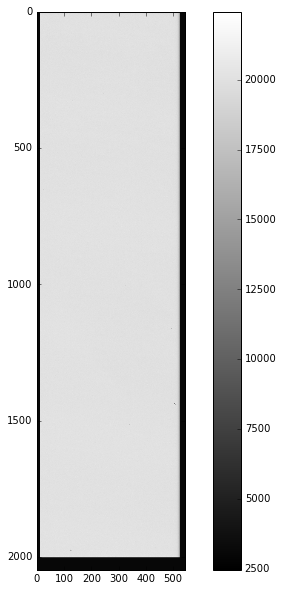

In [9]:
# display image as grayscale with colorbar
fig1=plt.figure(1,[figwidth,figheight])
plt.imshow(pixeldata,cmap = 'gray')
plt.colorbar()

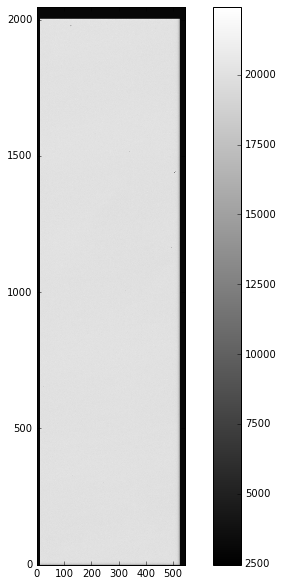

In [10]:
# that's fine, but can we please flip it so first pixel read out is in lower left corner? 
fig1=plt.figure(1,[figwidth,figheight])
plt.imshow(pixeldata,cmap = 'gray',origin='lower')
plt.colorbar()

# OK, that's better but need to remember that index order is still (row,column) and not (x,y)

RuntimeError: matplotlib does not support generators as input

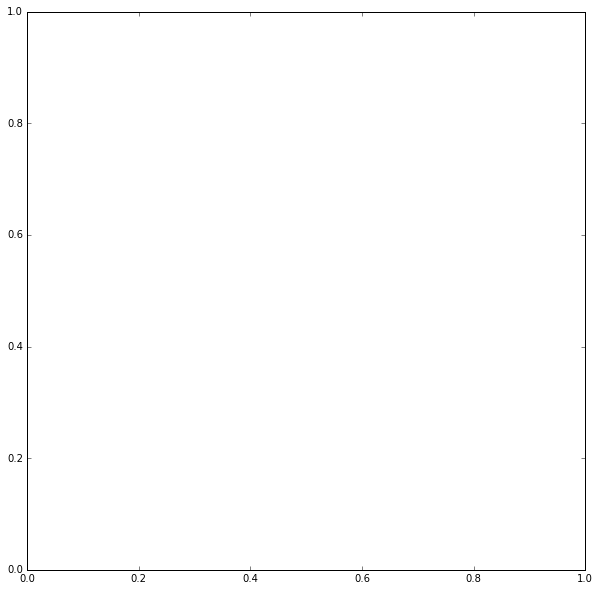

In [13]:
# make histogram of pixel values. pixeldata.flat makes 1-d array. Do 3 sigma clipping to exclude outliers

sigma_clipped_pixels = astropy.stats.sigma_clip(pixeldata[0:2002,11:512].flat)
fig2 = plt.figure(2,[figwidth,figheight])
pixel_range = sigma_clipped_pixels.min(), sigma_clipped_pixels.max()
plt.hist(pixeldata.flat,bins=50,range=pixel_range)
fig2.suptitle('histogram of 3-sigma clipped pixel values')

# Pixel Response NonUniformity spec is 5% rms. This is same as sigma of the distibution
pixel_sigma=np.std(pixeldata[0:2002,11:512].flat)# use only the imaging area
PRNU=100*(pixel_sigma/np.mean(pixeldata[0:2002,11:512].flat))
print "PRNU for this image is %.1f percent, LSST spec is 5 percent" %PRNU


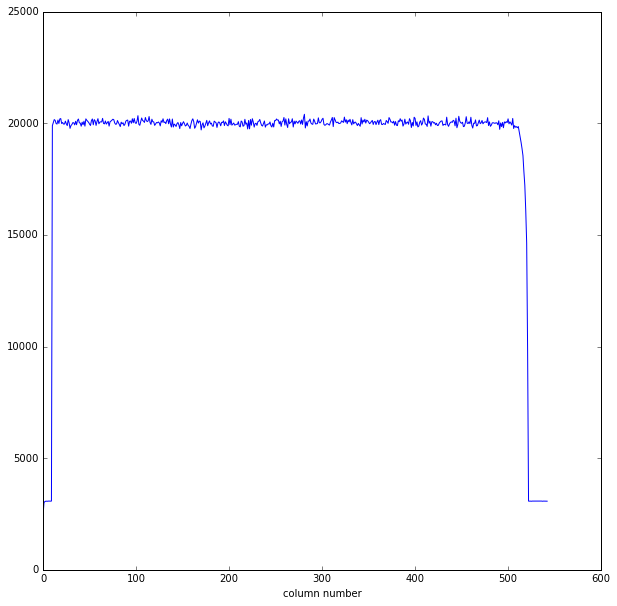

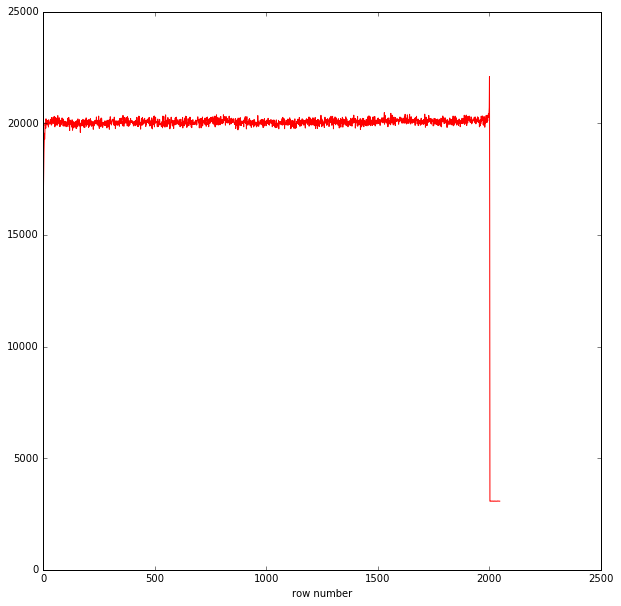

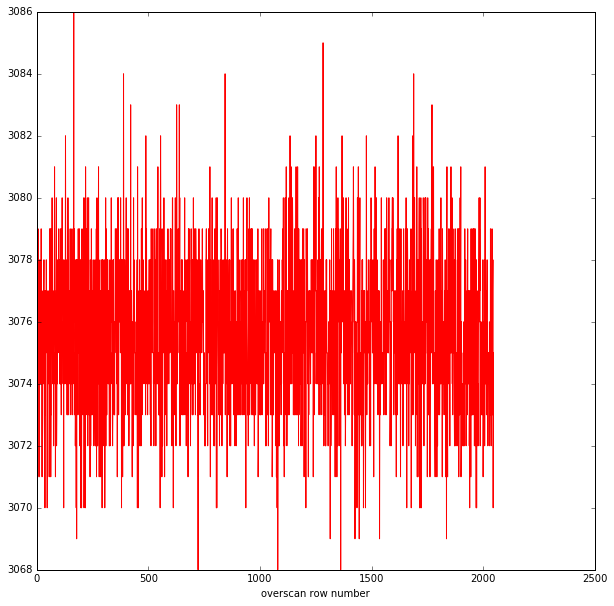

In [14]:
# row plot, horizontal cut across columns
fig3=plt.figure(3,[figwidth,figheight])
plt.plot(pixeldata[500,0:543],'b')
plt.xlabel('column number')


# column plot, vertical cut across rows
fig4=plt.figure(4,[figwidth,figheight])
plt.plot(pixeldata[0:2047,200],'r')
plt.xlabel('row number')


# column plot of overscan region, vertical cut across rows
fig5=plt.figure(5,[figwidth,figheight])
plt.plot(pixeldata[0:2047,530],'r')
plt.xlabel('overscan row number')


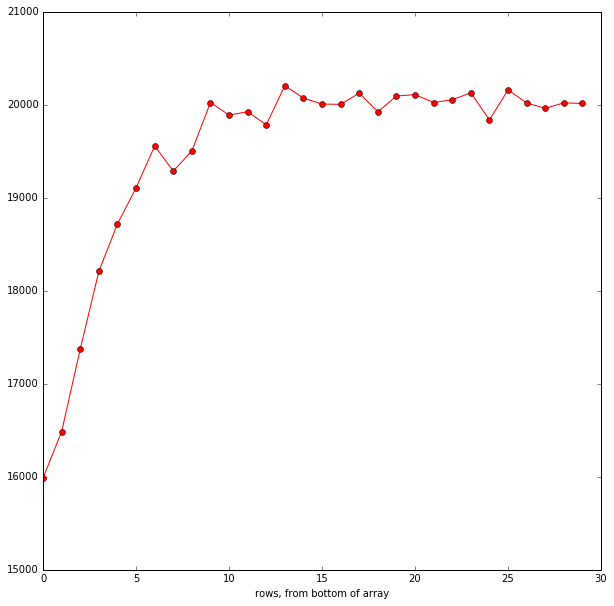

In [15]:
# edge rolloff plot. Flux is diminished at low row numbers, near the serial register. 
fig5=plt.figure(5,[figwidth,figheight])
plt.plot(pixeldata[0:30,200],'ro-')
plt.xlabel("rows, from bottom of array")


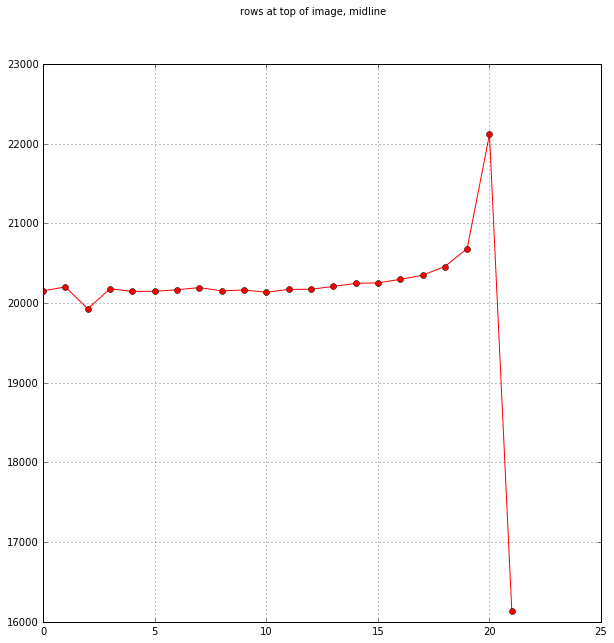

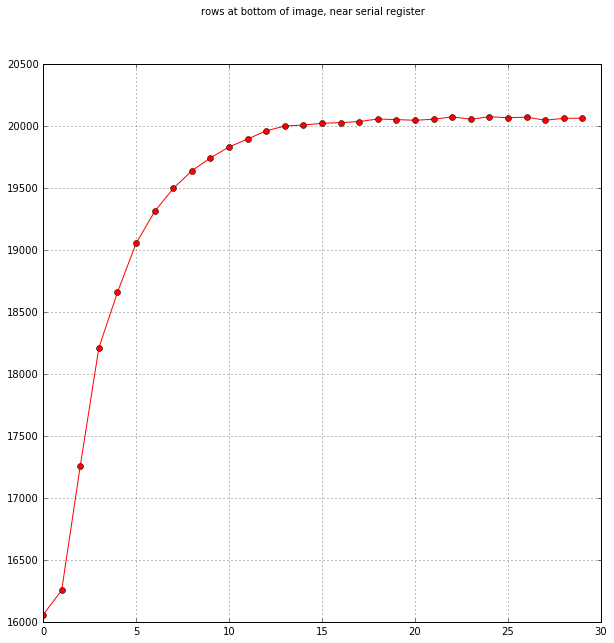

In [16]:
# get better statistics by averaging multiple columns
# picking axis=0 gives average of multiple rows, axis=1 is average of multiple columns
# this averages columns 200 to 299
avgcol=np.mean(pixeldata[0:2047,200:300],axis=1)

# plot edge rolloff using averaged column, better statistics
fig6=plt.figure(6,[figwidth,figheight])
plt.plot(avgcol[0:30],'ro-')
plt.grid()
fig6.suptitle('rows at bottom of image, near serial register')

# what about the upper edge, near the midline of the CCD? 
# this perturbation is due to midline bleed stop implant. It repels charge so top row is deficient but next 
# one catches the charge
fig8=plt.figure(8,[figwidth,figheight])
plt.plot(avgcol[1980:2002],'ro-')
plt.grid()
fig8.suptitle('rows at top of image, midline')

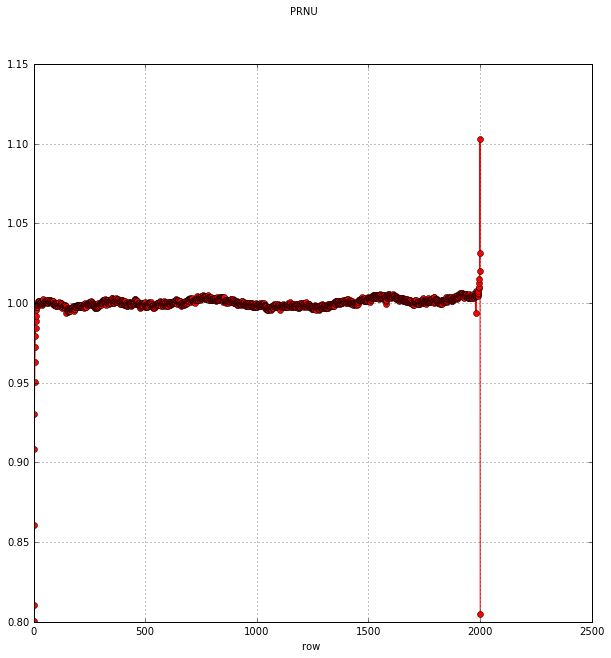

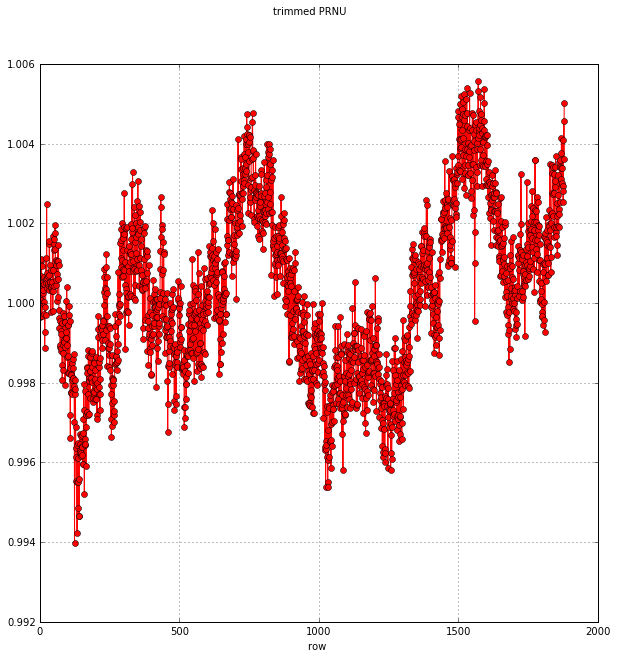

In [17]:
# what is Response Non-Uniformity in column direction? Only use imaging pixels, presumes uniform illumination
PRNUcol=avgcol[0:2002]/np.mean(avgcol[0:2002])
fig8=plt.figure(8,[figwidth,figheight])
plt.plot(PRNUcol,'ro-')
plt.grid()
fig8.suptitle('PRNU')
plt.xlabel('row ')

# dominated by edge rolloff at bottom and midline bleed artifact at the top. Omit those pixels 
PRNUtrim=PRNUcol[20:1900]
fig9=plt.figure(9,[figwidth,figheight])
plt.plot(PRNUtrim,'ro-')
plt.grid()
fig9.suptitle('trimmed PRNU')
plt.xlabel('row ')

# there is definitely a periodic low frequency modulation, that dominates the response. How about high frequencies? 

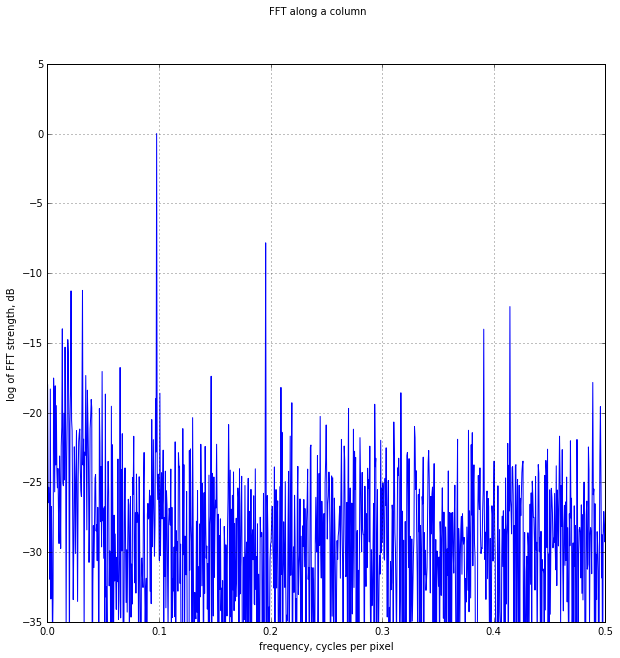

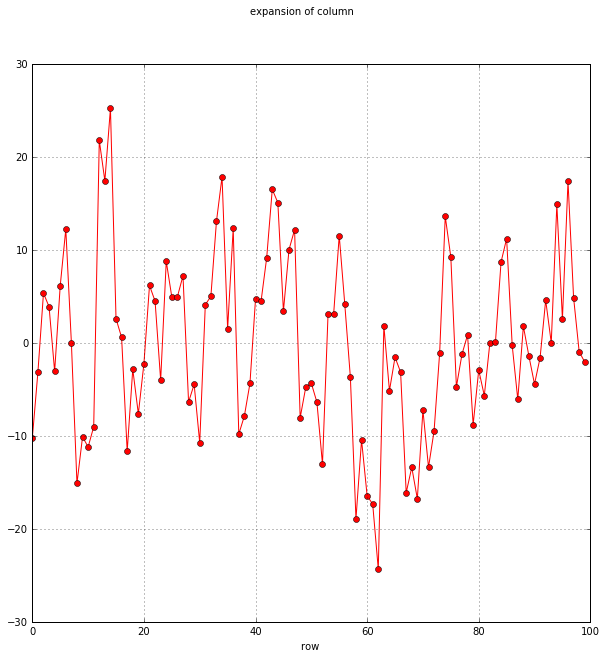

In [18]:
# implement high pass filter by taking median and subtracting it from the column average 
avgcol2=np.mean(pixeldata[15:1950,100:500],axis=1) # create an average column that excludes top and bottom of amplifier
avgcol2_med = sc.signal.medfilt(avgcol2, 51)  # make low-pass filtered version of this using median over 51 pixel box
avgcol2_HF=avgcol2-avgcol2_med # subtract off the low order structure to emphasize small scale structure

# always make sure average is zero before taking an FFT!
avgcol2_HF=avgcol2_HF-np.median(avgcol2_HF) 

# try a spatial Fourier transform 
from scipy.fftpack import fft, fftshift
A = fft(avgcol2_HF, 2048) / (len(avgcol2_HF)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))  # this is cycles per sample, so cycles per pixel. 
FFTavgcol2 = 20 * np.log10(np.abs(fftshift(A / abs(A).max()))) # take log of power, dB units
fig10=plt.figure(10,[figwidth,figheight])
plt.plot(freq, FFTavgcol2)
plt.axis([0, 0.5, -35 ,5])
plt.xlabel("frequency, cycles per pixel") # final element on right is Nyquist-sampled two cycles per pixel
plt.ylabel("log of FFT strength, dB")
plt.grid()
fig10.suptitle('FFT along a column')

# looks like a peak and harmonics at ~10 pixel period, but not exactly locked to pixels. 
# Can we see that in spatial plot? Sort-of...

fig11=plt.figure(11,[figwidth,figheight])
plt.plot(avgcol2_HF[200:300],'ro-')
plt.grid()
fig11.suptitle('expansion of column')
plt.xlabel('row ')

# OK, 

signal span of bias region is 0.343840334664


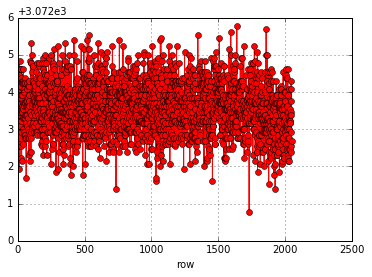

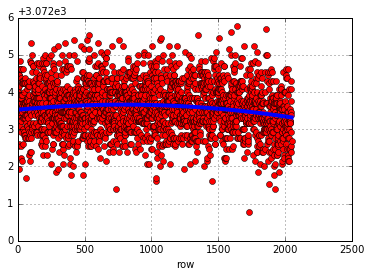

In [19]:
# what is the temporal stability of the overscan, as each row is read out? 
# make an average column in the overscan region
overscancolavg=np.mean(pixeldata[0:2047,530:543],axis=1)
fig9=plt.figure(9)
plt.plot(overscancolavg,'ro-')
plt.grid()
plt.xlabel('row')

# Just for fun, try a polynomial fit to the overscan. Need a counter for this
rowcountermax=overscancolavg.size
rowcounter=[i for i in range(rowcountermax)]

# fit to a quadratic
quadfit=np.polyfit(rowcounter,overscancolavg,2)

# evaluate the fit
biasfit=np.polyval(quadfit,rowcounter)

# plot fit and data
fig10=plt.figure(10)
plt.plot(rowcounter,overscancolavg,'ro')
plt.plot(rowcounter,biasfit,'b',linewidth=4)
plt.grid()
plt.xlabel('row')

print"signal span of bias region is %s" %(np.max(biasfit)-np.min(biasfit))


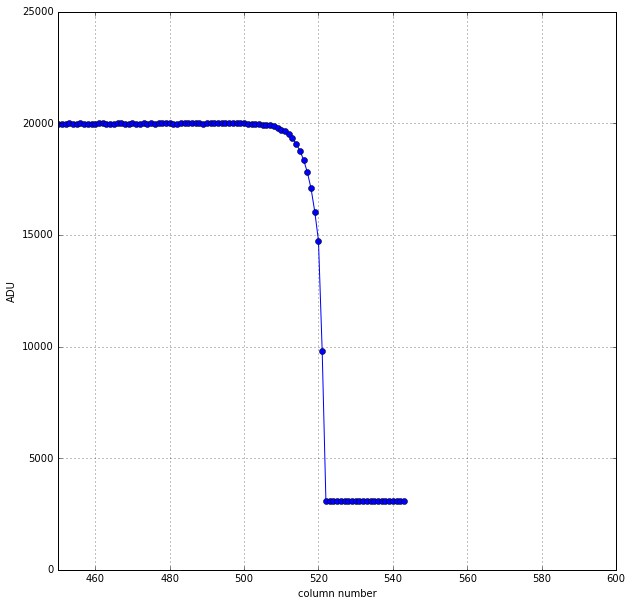

In [20]:
# what about in the other direction? 
row_100_200avg=np.mean(pixeldata[100:200,:],axis=0) # make average of rows 100 to 199

fig11=plt.figure(11,[figwidth,figheight])
plt.plot(row_100_200avg,'bo-')
plt.xlim(xmin=450)
plt.grid()
plt.xlabel('column number')
plt.ylabel('ADU')


first few values of overscan region are [ 20133.74  19962.85   2722.58]


(480, 600.0)

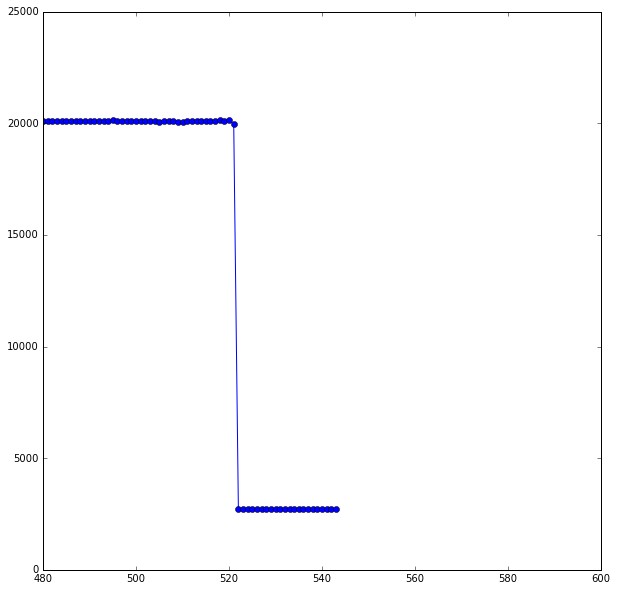

In [21]:
# yuk! is that edge rolloff at the right edge of the imaging array? Look at an interior amp instead...

# pick extension 5 of the FITS file
pixeldata5=hdulist[5].data

# average a few rows together and plot the result
row_100_200avg_5=np.mean(pixeldata5[100:200,:],axis=0)
print "first few values of overscan region are %s" %row_100_200avg_5[520:523]

fig12=plt.figure(12,[figwidth,figheight])
plt.plot(row_100_200avg_5,'bo-')
plt.xlim(xmin=480)


In [22]:
# looks like 523 to 544 are useful. 
readnoise5=np.std(pixeldata5[:,523:544])
print "read noise from overscan is %.2f ADU" %readnoise5 

read noise from overscan is 2.59 ADU


In [23]:
# what happens if we start including pixels that aren't clean bias ones?
print "including first overscan column gives read noise of %.2f ADU" %np.std(pixeldata5[:,522:544])
print "including last data region column gives read noise of %.2f ADU, and that ain't right! " %np.std(pixeldata5[:,521:544]) 


including first overscan column gives read noise of 3.21 ADU
including last data region column gives read noise of 3483.29 ADU, and that ain't right! 


In [24]:
# try for CTE determination
row_CTE_trimmed=np.mean(pixeldata5[100:200,521:544],axis=0)
row_CTE_trimmed.size

row_CTE_trimmed_debiased=row_CTE_trimmed-np.mean(row_CTE_trimmed[5:23])

# make all numbers non-negative
row_CTE_trimmed_debiased_abs=np.abs(row_CTE_trimmed_debiased)
# check that this worked
print "smallest value is %s" %np.min(row_CTE_trimmed_debiased_abs)


# first overscan pixel has a fraction (1-CTE) of last imaging pixel's flux
print "simplistic CTE estimate is %s" %(1-row_CTE_trimmed_debiased_abs[1]/row_CTE_trimmed_debiased_abs[0])



smallest value is 0.0061111111113
simplistic CTE estimate is 0.999467583789


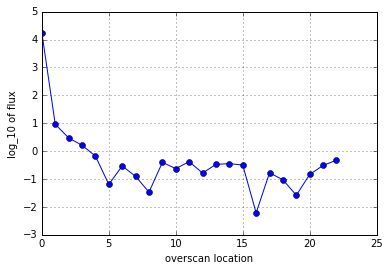

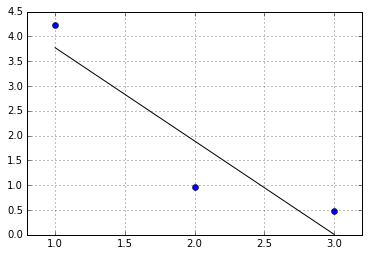

In [25]:
# try using a fit with log of abs(data). Each pixel should be I(n)=I(0)*(1-CTE)^n
logCTEarray=np.log10(row_CTE_trimmed_debiased_abs)

fig13=plt.figure(13)
plt.plot(logCTEarray,'bo-')
plt.grid()
plt.ylabel('log_10 of flux')
plt.xlabel('overscan location')

# try using more pixels:
counter=np.array([1, 2, 3])

CTEfit=np.polyfit(counter,logCTEarray[0:3],1)
CTEfit_eval=np.polyval(CTEfit,counter)

fig14=plt.figure(14)
plt.plot(counter,logCTEarray[0:3],'bo')
plt.plot(counter,CTEfit_eval,'k')
plt.xlim(xmin=0.8)
plt.xlim(xmax=3.2)
plt.grid()


# that wasn't very successful- measuring CTE is hard if signature is not evident.


bias value is 2713.42940889
lowest pixel value is 684.570591109
higheset pixel value is 19904.5705911


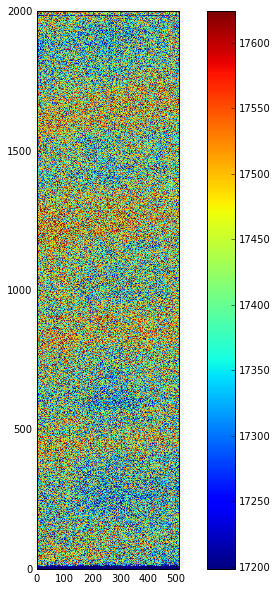

In [26]:
# construct bias-subtracted, trimmed image

# compute bias level from the overscan
print "bias value is %s" %np.mean(pixeldata5[0:2047,524:540])

pixeldata5_bias=pixeldata5-np.mean(pixeldata5[0:2047,524:540])

# keep amending array name as successive operations are applied
pixeldata5_bias_trimmed=pixeldata5_bias[0:2002,10:522]

# let's try to auto-scale the display
sortedpixels=np.sort(pixeldata5_bias_trimmed.flat)

lowestpixel=sortedpixels[0]
highestpixel=sortedpixels[-1]

print("lowest pixel value is %s") %lowestpixel
print("higheset pixel value is %s") %highestpixel

# scale to 5% and 95% values

fivepercent=sortedpixels[np.int(0.05*len(sortedpixels))]
ninetyfivepercent=sortedpixels[np.int(0.95*len(sortedpixels))]

fig16=plt.figure(16,[figwidth,figheight])
plt.imshow(pixeldata5_bias_trimmed,cmap='jet',vmin=fivepercent,vmax=ninetyfivepercent,origin='lower')
plt.colorbar()
